In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
PROJECT_DIR = '/content/drive/My Drive/CQL'
os.chdir(PROJECT_DIR)

Mounted at /content/drive
/content/drive/My Drive/CQL
.:
configs  datasets   pytest.ini	requirements.txt  scripts  tests
data	 ml-1m.zip  README.md	results		  src

./configs:
default.yaml

./data:
processed  raw

./data/processed:
metadata.json	       test_trajectories.pkl   val_trajectories.pkl
movie_id_mapping.json  train_trajectories.pkl  zipcode_vocab.json

./data/raw:
ml-1m

./data/raw/ml-1m:
movies.dat  ratings.dat  README  users.dat

./datasets:
datasets_description.md

./results:
evaluation_50epochs_final.json	evaluation_50epochs.json

./scripts:
evaluate.py  preprocess_data.py  train_cql.py
__init__.py  train_bc.py	 train.py

./src:
data_module  evaluation  __init__.py  models  __pycache__  training  utils

./src/data_module:
cleaners.py   dataset.py   parsers.py	static_encoder.py
constants.py  __init__.py  __pycache__	trajectory.py

./src/data_module/__pycache__:
cleaners.cpython-312.pyc   parsers.cpython-312.pyc
constants.cpython-312.pyc  static_encoder.cpython-312.pyc
__ini

In [ ]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.9/252.9 kB 24.6 MB/s eta 0:00:00


In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-1m.zip -O ml-1m.zip
!unzip -q ml-1m.zip -d data/raw

--2025-12-09 15:42:53--  https://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  6.42MB/s    in 0.9s    

2025-12-09 15:42:54 (6.42 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]



In [ ]:
!PYTHONPATH="/content/drive/My Drive/CQL" python scripts/preprocess_data.py \
    --data_dir data/raw/ml-1m/ \
    --output_dir data/processed

MovieLens-1M Data Preprocessing
Data directory: data/raw/ml-1m
Output directory: data/processed
Min interactions: 20
Train/Val/Test ratio: 70%/15%/15%

[1/6] Parsing raw data files...
  Ratings: 1,000,209 records
  Users: 6,040 records
  Movies: 3,883 records

[2/6] Cleaning data...
  Valid movie IDs: 3,883
  Cleaned ratings: 1,000,209 (100.0% retained)
  Unique zipcode prefixes: 678
  Top 5 zipcodes: ['554', '100', '551', '941', '021']

[3/6] Building user trajectories...
  Total trajectories: 6040

All trajectories:
  Trajectories: 6040
  Avg length: 165.60
  Min/Max length: 20 / 2314
  Median length: 96.00
  Total interactions: 1000209

[4/6] Performing temporal split...

Train:
  Trajectories: 6040
  Avg length: 115.46
  Min/Max length: 14 / 1619
  Median length: 67.00
  Total interactions: 697378

Validation:
  Trajectories: 6040
  Avg length: 24.82
  Min/Max length: 3 / 347
  Median length: 14.00
  Total interactions: 149931

Test:
  Trajectories: 6040
  Avg length: 25.31
  Min/M

In [ ]:
!PYTHONPATH="/content/drive/My Drive/CQL" python scripts/train_cql.py --data_dir data/processed --num_epochs 5

2025-12-09 20:58:41.504303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765313921.525088    2301 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765313921.531340    2301 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765313921.547296    2301 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765313921.547321    2301 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765313921.547324    2301 computation_placer.cc:177] computation placer alr

In [ ]:
!PYTHONPATH="/content/drive/My Drive/CQL" python scripts/train.py --data_dir data/processed --num_epochs 5

2025-12-09 21:00:55.796041: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765314055.816087    3109 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765314055.822091    3109 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765314055.837286    3109 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765314055.837313    3109 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765314055.837315    3109 computation_placer.cc:177] computation placer alr

In [ ]:
!PYTHONPATH="/content/drive/My Drive/CQL" python scripts/evaluate_cql.py \
    --iql_checkpoint checkpoints/iql/iql_best.pt \
    --cql_checkpoint checkpoints/cql/cql_best.pt \
    --k_values 10 20 50 \
    --output_path results/evaluation_topk_iql_cql.json

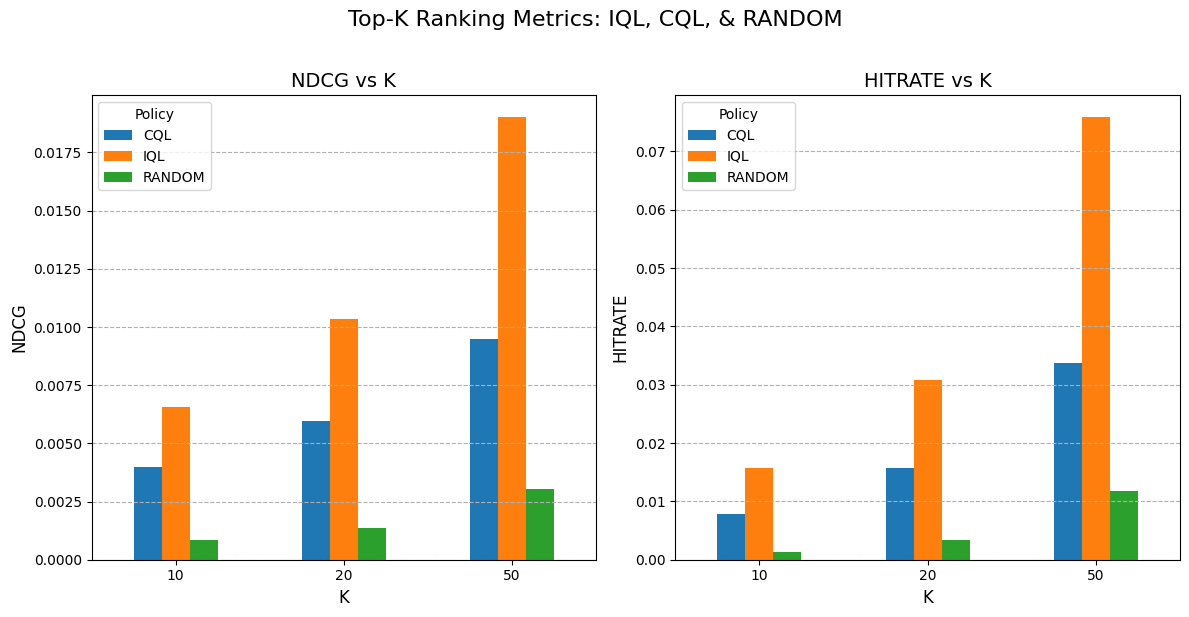

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Any


def plot_evaluation_metrics_multi(data: Dict[str, Any]):
    metrics_data = []
    target_metrics = ["ndcg", "hitrate"]

    for key, value in data.items():
        if "@" not in key:
            continue

        if key.startswith("rand_"):
            policy_name = "RANDOM"
            parts = key[len("rand_"):].split("@")
        elif key.startswith("iql_"):
            policy_name = "IQL"
            parts = key[len("iql_"):].split("@")
        elif key.startswith("cql_"):
            policy_name = "CQL"
            parts = key[len("cql_"):].split("@")
        else:
            continue

        metric_type = parts[0]
        if metric_type not in target_metrics:
            continue
        k_value = int(parts[1])

        metrics_data.append(
            {"K": k_value, "Metric": metric_type, "Policy": policy_name, "Value": value}
        )

    df = pd.DataFrame(metrics_data)
    if df.empty:
        print("No matching metrics found in data.")
        return

    k_values = sorted(df["K"].unique())
    metric_types = df["Metric"].unique()

    fig, axes = plt.subplots(
        nrows=1,
        ncols=len(metric_types),
        figsize=(6 * len(metric_types), 6)
    )

    if len(metric_types) == 1:
        axes = [axes]

    for i, metric in enumerate(metric_types):
        ax = axes[i]
        plot_df = df[df["Metric"] == metric]
        pivot = plot_df.pivot_table(index="K", columns="Policy", values="Value")
        pivot.plot(kind="bar", ax=ax, rot=0)
        ax.set_title(f"{metric.upper()} vs K", fontsize=14)
        ax.set_xlabel("K", fontsize=12)
        ax.set_ylabel(metric.upper(), fontsize=12)
        ax.legend(title="Policy")
        ax.grid(axis="y", linestyle="--")

    plt.suptitle("Top-K Ranking Metrics: IQL, CQL, & RANDOM", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

with open("results/evaluation_topk_iql_cql.json", "r") as f:
    results = json.load(f)

plot_evaluation_metrics_multi(results)
